# Module 3- Regression & Beta Calculation



   ### Welcome to the Answer notebook for Module 3 ! 
Make sure that you've submitted the module 2 notebook and unlocked Module 3 yourself before you start coding here


#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

### Query 3.1 
Import the file 'gold.csv', which is contains the data about last 2 years price action of Indian(MCX) gold standard. Explore the dataframe. You'd see 2 unique columns - 'Pred' and 'new'.

One of the 2 columns is a linear combination of the OHLC prices with varying coefficients while the other is a polynomial fucntion of the same inputs. Also, one of the 2 columns is partially filled.

>Using linear regression, find the coefficients of the inputs and using the same trained model, complete the
      entire column.
      
>Also, try to fit the other column as well using a new linear regression model. Check if the predicitons are 
      accurate.
      Mention which column is a linear function and which is a polynomial function.
      (Hint: Plotting a histogram & distplot helps in recognizing the  discrepencies in prediction, if any.)

In [70]:
import pandas as pd
import numpy as np
gold=pd.read_csv('GOLD.csv')
gold

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
5,"May 11, 2017",28022,27995,28100,27945,9.72K,0.05%,149.0,182.427089
6,"May 12, 2017",28019,28088,28195,27985,9.48K,-0.01%,167.0,141.255137
7,"May 15, 2017",28008,28049,28157,27996,8.76K,-0.04%,22.0,120.069010
8,"May 16, 2017",28109,28025,28159,28025,7.73K,0.36%,34.0,218.401641
9,"May 17, 2017",28614,28170,28638,28170,15.92K,1.80%,420.0,919.376358


In [71]:
data=gold.dropna()
data.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [72]:
x=data.Pred.values.reshape(-1,1)
y=data.new.values.reshape(-1,1)

In [73]:
from sklearn.linear_model import LinearRegression
Lreg=LinearRegression()
Lreg.fit(y,x)
predict=Lreg.predict(y) 
predict

array([[342.70257957],
       [341.238649  ],
       [342.58279653],
       [342.83651718],
       [342.74716944],
       [342.16875806],
       [342.50763735],
       [342.68201674],
       [341.87265768],
       [336.10305478],
       [339.75743795],
       [341.83567109],
       [340.16610362],
       [342.06980326],
       [343.09997826],
       [343.34742275],
       [340.82111366],
       [342.41688187],
       [343.14981343],
       [339.16706918],
       [343.36399343],
       [338.74738789],
       [342.01336268],
       [339.17158548],
       [342.74518791],
       [342.63868396],
       [342.75985623],
       [342.58155532],
       [342.34447746],
       [341.36470623],
       [343.2883611 ],
       [343.36520019],
       [343.56278339],
       [342.72198673],
       [342.61215252],
       [342.20354064],
       [341.70856304],
       [341.19273251],
       [341.66612912],
       [342.72235769],
       [342.22264151],
       [342.61246287],
       [343.44506751],
       [341

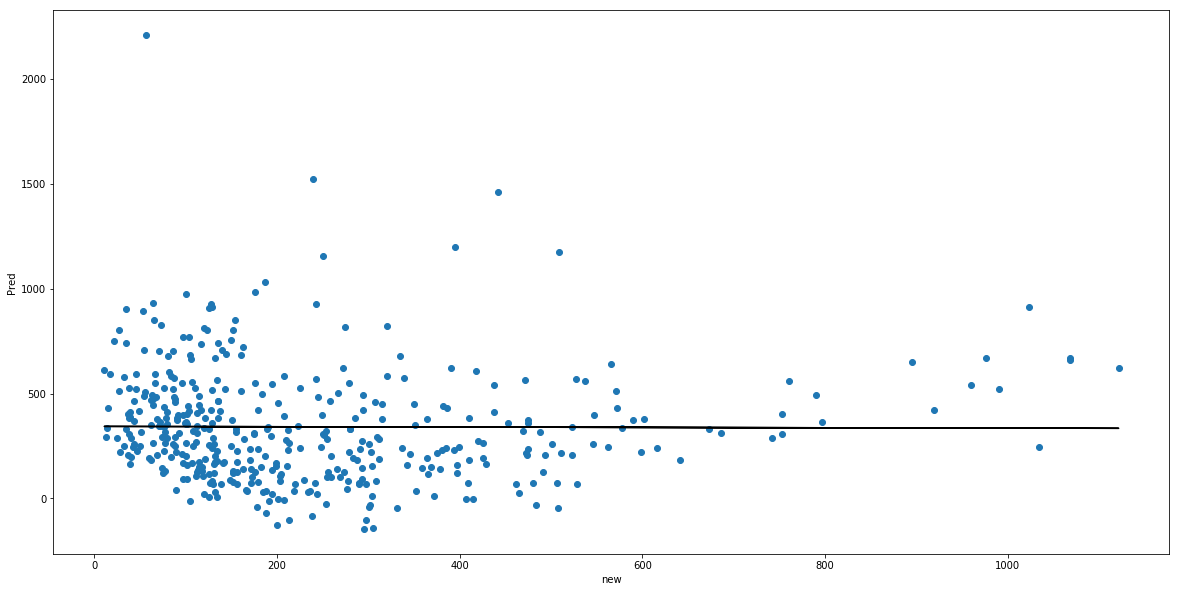

In [74]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.scatter(y,x)
plt.plot(y,predict,color='k')
plt.xlabel('new')
plt.ylabel('Pred')
plt.show()

In [75]:
#accuracy
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('intercept = ',Lreg.intercept_)
print('coefficient = ',Lreg.coef_)

rmse = mean_squared_error(x,predict)
r2 = r2_score(x,predict)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

intercept =  [343.67028421]
coefficient =  [[-0.00823083]]
Root mean squared error:  73300.46132887459
R2 score:  3.732507600850976e-05


In [76]:
# predicting the values
n_data=gold.loc[gold.Pred.isnull()]
comp=n_data.new.values.reshape(-1,1)
predic=Lreg.predict(comp)


In [77]:
#completing the column
r1,c1=n_data.shape
r2,c2=gold.shape
r2=r2-1
r1=r1-1
while(r1>0 or r2>0):
    if gold.index[r2]==n_data.index[r1]:
        gold['Pred'][r2]=predic[r1]
        r2=r2-1
        r1=r1-1
    else:
        r2=r2-1
gold

/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.000000,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.000000,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.000000,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.000000,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.000000,112.153318
5,"May 11, 2017",28022,27995,28100,27945,9.72K,0.05%,149.000000,182.427089
6,"May 12, 2017",28019,28088,28195,27985,9.48K,-0.01%,167.000000,141.255137
7,"May 15, 2017",28008,28049,28157,27996,8.76K,-0.04%,22.000000,120.069010
8,"May 16, 2017",28109,28025,28159,28025,7.73K,0.36%,34.000000,218.401641
9,"May 17, 2017",28614,28170,28638,28170,15.92K,1.80%,420.000000,919.376358


In [78]:
# taking data for new model
x=gold.Pred.values.reshape(-1,1)
y=gold.new.values.reshape(-1,1)

In [79]:
LinR=LinearRegression()
LinR.fit(x,y)
predict=LinR.predict(x)
predict

array([[242.81862875],
       [248.04488802],
       [247.00436582],
       [245.07112285],
       [246.44863236],
       [246.30083091],
       [246.19441387],
       [247.05166228],
       [246.98071758],
       [244.6986632 ],
       [245.79830598],
       [245.14206755],
       [245.61503219],
       [246.36586355],
       [244.94696963],
       [244.7400476 ],
       [245.91654714],
       [246.46636854],
       [244.27890708],
       [244.83464053],
       [244.79325612],
       [245.86925068],
       [247.19946373],
       [245.65050453],
       [245.1479796 ],
       [241.82540301],
       [244.07198505],
       [246.15302946],
       [243.13196782],
       [245.23666047],
       [243.68178922],
       [245.96975567],
       [245.45540662],
       [246.29491886],
       [244.6986632 ],
       [247.43003399],
       [247.66651631],
       [245.63276836],
       [247.04575022],
       [246.15894152],
       [243.93009565],
       [241.69533773],
       [242.42843292],
       [247

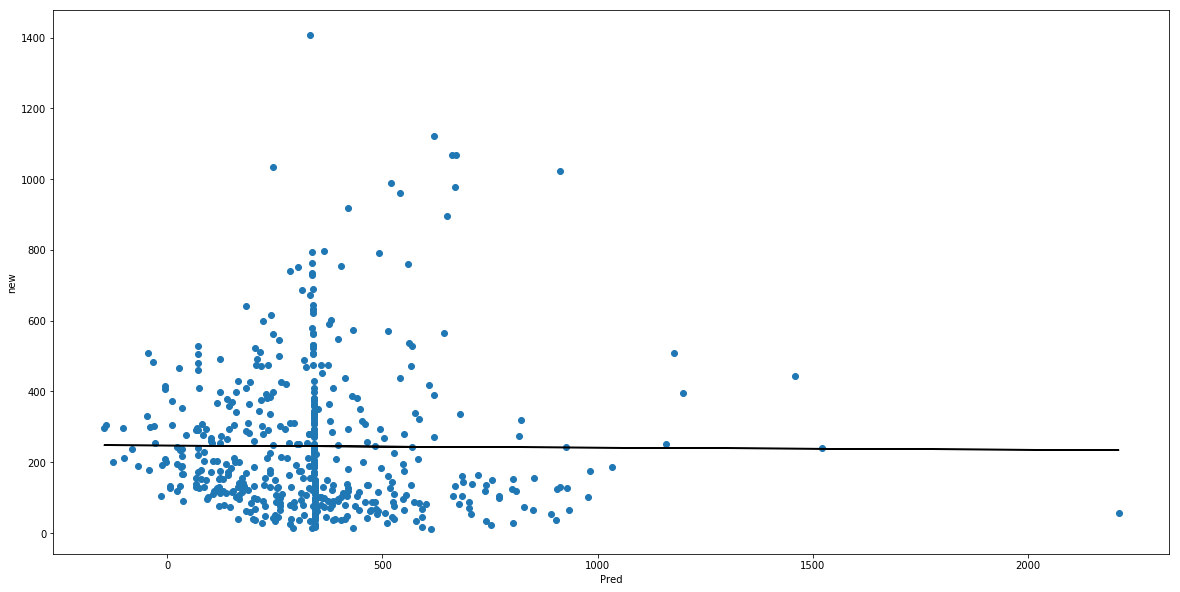

In [80]:
plt.figure(figsize=(20,10))
plt.scatter(x,y)
plt.plot(x,predict,color='k')
plt.xlabel('Pred')
plt.ylabel('new')
plt.show()

In [81]:
#accuracy
print('intercept = ',LinR.intercept_)
print('coefficient = ',LinR.coef_)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y,predict)
r2 = r2_score(y,predict)
score=LinR.score(y,x)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)
print('data score: ',score)

intercept =  [247.18172756]
coefficient =  [[-0.00591206]]
Root mean squared error:  42264.30046474349
R2 score:  4.866113743151601e-05
data score:  -0.15631294083927383


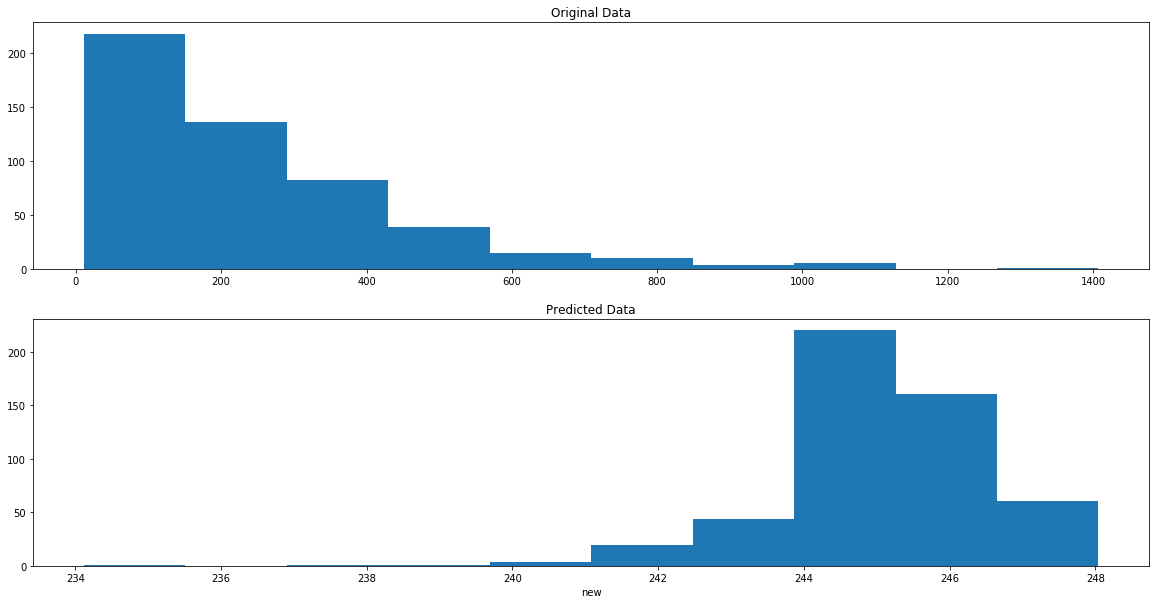

In [82]:
fig,ax=plt.subplots(2,1,figsize=(20,10))
ax[0].hist(gold.new)
plt.xlabel('new')
ax[0].set_title('Original Data')
ax[1].hist(predict)
ax[1].set_title('Predicted Data')
plt.show()

/opt/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


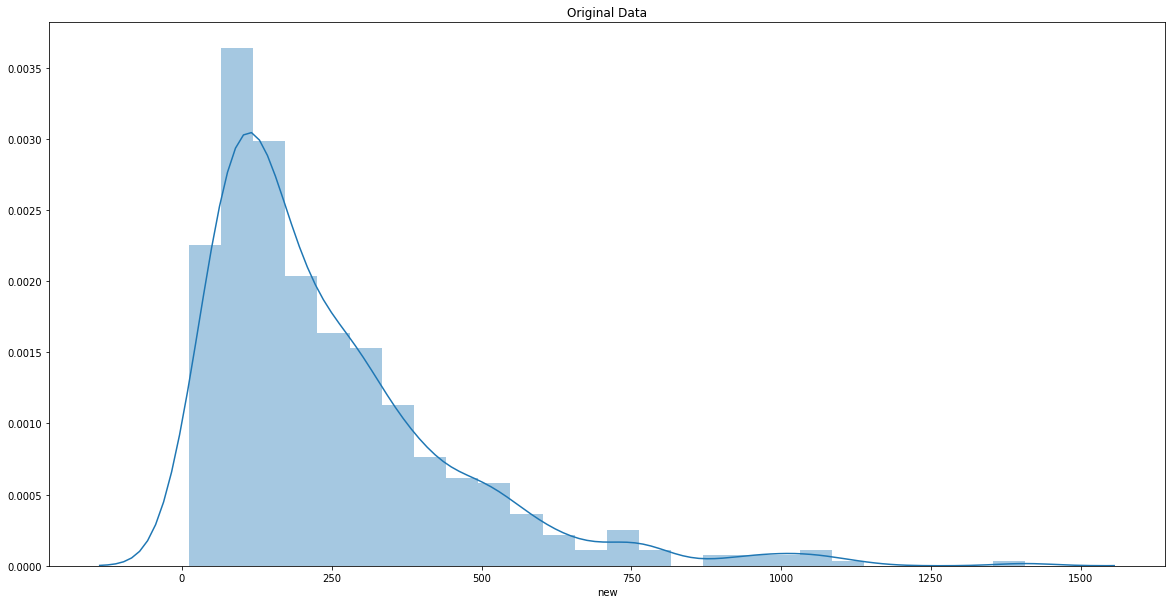

/opt/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


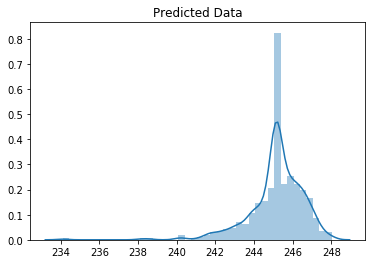

In [83]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.distplot(gold.new)
plt.xlabel('new')
plt.title('Original Data')
plt.show()
sns.distplot(predict)
plt.title('Predicted Data')
plt.show()

### Query 3.2
Import the stock of your choosing AND the Nifty index. 
Using linear regression (OLS), calculate -
The daily Beta value for the past 3 months. (Daily= Daily returns)
The monthly Beta value. (Monthly= Monthly returns)
Refrain from using the (covariance(x,y)/variance(x)) formula. 
Attempt the question using regression.(Regression Reference) 
Were the Beta values more or less than 1 ? What if it was negative? 
Discuss. Include a brief writeup in the bottom of your jupyter notebook with your inferences from the Beta values and regression results

In [84]:
nifty=pd.read_csv('Nifty50.csv')
nifty.Date=nifty.Date.astype('datetime64[ns]')
nifty.set_index('Date', inplace=True)
nifty.head()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
Date,,,,,,
2017-05-15,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
2017-05-16,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2017-05-17,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
2017-05-18,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
2017-05-19,9469.90,9505.75,9390.75,9427.90,259861396,11544.77


In [85]:
mind=pd.read_csv('MINDTREE.csv')
mind.Date=mind.Date.astype('datetime64[ns]')
mind.set_index('Date', inplace=True)
mind.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,MINDTREE,EQ,510.60,507.35,515.00,505.90,510.50,509.45,510.39,271952,1.388005e+08,8261,100362,36.90
2017-05-16,MINDTREE,EQ,509.45,507.00,515.85,506.00,511.00,511.30,512.69,207011,1.061317e+08,5550,82090,39.65
2017-05-17,MINDTREE,EQ,511.30,507.05,519.70,502.75,504.00,506.35,512.10,391401,2.004375e+08,13341,150098,38.35
2017-05-18,MINDTREE,EQ,506.35,502.00,516.75,486.00,487.50,492.90,505.60,852336,4.309377e+08,18513,170919,20.05
2017-05-19,MINDTREE,EQ,492.90,491.95,502.95,489.50,495.15,497.50,496.43,352273,1.748782e+08,8326,57853,16.42


In [86]:
nifty['Daily Return']=(nifty['Close'].pct_change().fillna(0))*100
mind['Daily Return']=(mind['Close Price'].pct_change().fillna(0))*100

In [87]:
import statsmodels.api as sm
x=mind['Daily Return'].tail(63)
y=nifty['Daily Return'].tail(63)
var=sm.add_constant(x)
Model=sm.OLS(y,var).fit()
Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Daily Return   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.1337
Date:                Mon, 19 Aug 2019   Prob (F-statistic):              0.716
Time:                        04:00:27   Log-Likelihood:                -66.215
No. Observations:                  63   AIC:                             136.4
Df Residuals:                      61   BIC:                             140.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0284      0.090      0.317      0.753      -0.151       0.208
Daily Return     0.0297      0.081      0.366      0.716      -0.133       0.192
==============================================================================
Omnibus:                        4.008   Durbin-Watson:                   1.583
Prob(Omnibus):                  0.135   Jarque-Bera (JB):                2.024
Skew:                           0.117   Prob(JB):                        0.363
Kurtosis:                       2.154   Cond. No.                         1.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
nif=pd.read_csv('Nifty50.csv')
nif.Date=nif.Date.astype('datetime64[ns]')
nif['month']=nif.Date.dt.month
nif['year']=nif.Date.dt.year
nif.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),month,year
0,2017-05-15,9433.55,9449.25,9423.10,9445.40,145163953,7790.97,5,2017
1,2017-05-16,9461.00,9517.20,9456.35,9512.25,171709433,9209.89,5,2017
2,2017-05-17,9517.60,9532.60,9486.10,9525.75,211856040,10726.23,5,2017
3,2017-05-18,9453.20,9489.10,9418.10,9429.45,199340647,10782.46,5,2017
4,2017-05-19,9469.90,9505.75,9390.75,9427.90,259861396,11544.77,5,2017


In [89]:
mindt=pd.read_csv('MINDTREE.csv')
mindt.Date=mindt.Date.astype('datetime64[ns]')
mindt['month']=mindt.Date.dt.month
mindt['year']=mindt.Date.dt.year
mindt.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,month,year
0,MINDTREE,EQ,2017-05-15,510.60,507.35,515.00,505.90,510.50,509.45,510.39,271952,1.388005e+08,8261,100362,36.90,5,2017
1,MINDTREE,EQ,2017-05-16,509.45,507.00,515.85,506.00,511.00,511.30,512.69,207011,1.061317e+08,5550,82090,39.65,5,2017
2,MINDTREE,EQ,2017-05-17,511.30,507.05,519.70,502.75,504.00,506.35,512.10,391401,2.004375e+08,13341,150098,38.35,5,2017
3,MINDTREE,EQ,2017-05-18,506.35,502.00,516.75,486.00,487.50,492.90,505.60,852336,4.309377e+08,18513,170919,20.05,5,2017
4,MINDTREE,EQ,2017-05-19,492.90,491.95,502.95,489.50,495.15,497.50,496.43,352273,1.748782e+08,8326,57853,16.42,5,2017


In [90]:
m_return=pd.DataFrame()
m_return['nifty']=nif.groupby(['year','month']).apply(lambda df: df['Close'].iloc[0])
m_return['mindtree']=mindt.groupby(['year','month']).apply(lambda fd: fd['Close Price'].iloc[0])
m_return.head()

nifty  mindtree
year month                    
2017 5       9445.40    509.45
     6       9616.10    537.40
     7       9615.00    529.05
     8      10114.65    472.60
     9       9974.40    460.85

In [91]:
m_return['nifty monthly return']=(m_return.nifty.pct_change().fillna(0))*100
m_return['mindtree monthly return']=(m_return.mindtree.pct_change().fillna(0))*100
m_return.head()

nifty  mindtree  nifty monthly return  mindtree monthly return
year month                                                                   
2017 5       9445.40    509.45              0.000000                 0.000000
     6       9616.10    537.40              1.807229                 5.486309
     7       9615.00    529.05             -0.011439                -1.553777
     8      10114.65    472.60              5.196568               -10.670069
     9       9974.40    460.85             -1.386603                -2.486246

In [92]:
a=m_return['nifty monthly return']
b=m_return['mindtree monthly return']
cons=sm.add_constant(b)
estm=sm.OLS(a,cons).fit()
estm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     nifty monthly return   R-squared:                       0.117
Model:                              OLS   Adj. R-squared:                  0.079
Method:                   Least Squares   F-statistic:                     3.057
Date:                  Mon, 19 Aug 2019   Prob (F-statistic):             0.0937
Time:                          04:00:32   Log-Likelihood:                -66.335
No. Observations:                    25   AIC:                             136.7
Df Residuals:                        23   BIC:                             139.1
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.5525      0.749      0.737      0.468      -0.997       2.102
mindtree monthly return     0.1202      0.069      1.748      0.094      -0.022       0.262
==============================================================================
Omnibus:                        0.663   Durbin-Watson:                   2.383
Prob(Omnibus):                  0.718   Jarque-Bera (JB):                0.561
Skew:                           0.334   Prob(JB):                        0.755
Kurtosis:                       2.696   Cond. No.                         11.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The Daily beta value for the past 3 months for the stock Mindtree is 0.0297 
Since it is less than 1, thus, it is less volatile than the benchmark
The Monthly beta value for the stock Mindtree is 0.1202 
Since it is less than 1, thus, it is less volatile than the benchmark
Both the values suggest that stocks move less than the market and pose less risk but also lower returns.
If the beta values were negative then possibly the returns would go down when the market goes up, and vice versa
From the above regression analysis, we can see that both R square values are closer to 0 which indicates that the target and feature aren't in a linear relatioinship.
Also the coefficient are closer to zero which in turn means that the value of p is less significant indicting a weak correlation between the coefficient and target